# Exploratory Data Analysis of banking data

The dataset used in this practice project is a subset of an open source Bank Marketing Dataset from the UCI ML repository: https://archive.ics.uci.edu/ml/citation_policy.html.

This analysis is to find answers to a set of questions that may be relevant when analyzing banking data:

1.  What is the share of clients attracted in our source data?
2.  What are the mean values of numerical features among the attracted clients?
3.  What is the average call duration for the attracted clients?
4.  What is the average age among the attracted and unmarried clients?
5.  What is the average age and call duration for different types of client employment?

## Libraries import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("precision", 2)
pd.options.display.float_format = '{:.2f}'.format

## Exploring dataset 

In [3]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [4]:
df.shape

(41188, 21)

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


Mean Age is aproximately 40 years old. (Minimum: 17 years old and Maximum: 98 years old.)

In [8]:
df.describe(include = ['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [9]:
df["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

4640 clients (11.3%) of 41188 issued a term deposit

In [10]:
d = {"no": 0, "yes": 1}
df["y"] = df["y"].map(d)

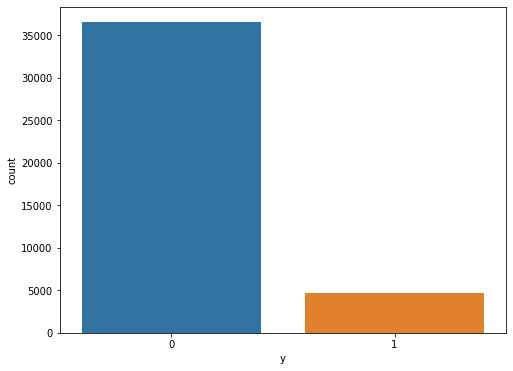

In [11]:
sns.countplot(df["y"]);

In [12]:
df["marital"].value_counts().head()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

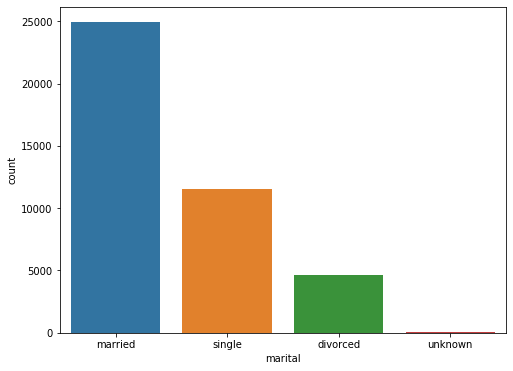

In [13]:
sns.countplot(df["marital"])

In [14]:
df["marital"].value_counts(normalize=True)

married    0.61
single     0.28
divorced   0.11
unknown    0.00
Name: marital, dtype: float64

As we can see, 61% (0.61) of clients are married, which must be taken into account when planning marketing campaigns to manage deposit operations.

### Sorting

In [15]:
df.sort_values(by= "duration", ascending=False).head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24091,33,technician,single,professional.course,no,yes,no,telephone,nov,mon,...,1,999,0,nonexistent,-0.10,93.20,-42.00,4.41,5195.80,0
22192,52,blue-collar,married,basic.4y,no,no,no,telephone,aug,thu,...,3,999,0,nonexistent,1.40,93.44,-36.10,4.96,5228.10,1
40537,27,admin.,single,high.school,no,no,no,telephone,aug,fri,...,1,999,0,nonexistent,-1.70,94.03,-38.30,0.89,4991.60,0
13820,31,technician,married,professional.course,no,no,no,cellular,jul,thu,...,1,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,1
7727,37,unemployed,married,professional.course,no,yes,no,telephone,may,fri,...,2,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,1


The sorting results show that the longest calls exceed one hour.

### Application of functions

In [16]:
df.apply(np.max)

age                      98
job                 unknown
marital             unknown
education           unknown
default                 yes
housing                 yes
loan                    yes
contact           telephone
month                   sep
day_of_week             wed
duration               4918
campaign                 56
pdays                   999
previous                  7
poutcome            success
emp.var.rate           1.40
cons.price.idx        94.77
cons.conf.idx        -26.90
euribor3m              5.04
nr.employed         5228.10
y                         1
dtype: object

The oldest client is 98 years old (age = 98), and the number of contacts with one of the customers reached 56 (campaign = 56).

<b>1. What is the share of clients attracted in our source data?

In [17]:
print("Share of attracted clients =", '{:.1%}'.format(df["y"].mean()))

Share of attracted clients = 11.3%


<b>2. What are the mean values of numerical features among the attracted clients?

In [18]:
df[df["y"] == 1].mean()

age                40.91
duration          553.19
campaign            2.05
pdays             792.04
previous            0.49
emp.var.rate       -1.23
cons.price.idx     93.35
cons.conf.idx     -39.79
euribor3m           2.12
nr.employed      5095.12
y                   1.00
dtype: float64

Thus, the average age of the attracted clients is about 41 (age = 40.91), and 2 calls were required to attract them (campaign = 2.05).

<b>3. What is the average call duration for the attracted clients?

In [20]:
acd = round(df[df["y"] == 1]["duration"].mean(), 2)
acd_in_min = acd // 60
print("Average call duration for attracted clients =", acd_in_min, "min", int(acd) % 60, "sec")

Average call duration for attracted clients = 9.0 min 13 sec


<b>4. What is the average age of attracted and unmarried clients?

In [21]:
print("Average age of attracted clients =", int(df[(df["y"] == 1) & (df["marital"] == "single")]["age"].mean()), "years")

Average age of attracted clients = 31 years


In [22]:
df[-1:]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.10,94.77,-50.80,1.03,4963.60,0


## Pivot tables

In [23]:
pd.crosstab(df["y"], df["marital"])

marital,divorced,married,single,unknown
y,,,,
0,4136,22396,9948,68
1,476,2532,1620,12


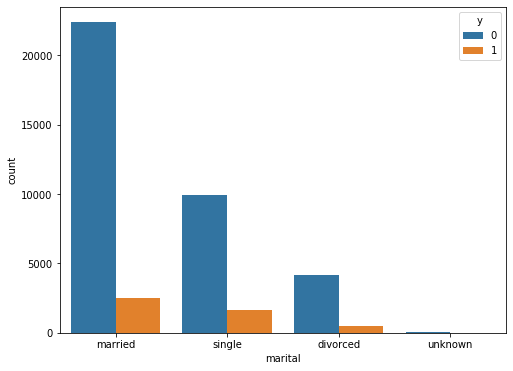

In [24]:
sns.countplot(x="marital", hue="y", data=df)

The result shows the married attracted clients is highest.

In [25]:
pd.crosstab(df["y"], df["marital"], normalize = 'index')

marital,divorced,married,single,unknown
y,,,,
0,0.11,0.61,0.27,0.00
1,0.10,0.55,0.35,0.00


More than half of the clients (61%) who have not issued a deposit are married. 

<b>5. What is the average age and call duaration for different types of client employment?

In [26]:
df.pivot_table(["age", "duration"], ["job"], aggfunc = "mean",).head(10)

,age,duration
job,,
admin.,38.19,254.31
blue-collar,39.56,264.54
entrepreneur,41.72,263.27
housemaid,45.50,250.45
management,42.36,257.06
retired,62.03,273.71
self-employed,39.95,264.14
services,37.93,258.40
student,25.89,283.68


## Visualization

<b>1. Scatter matrix

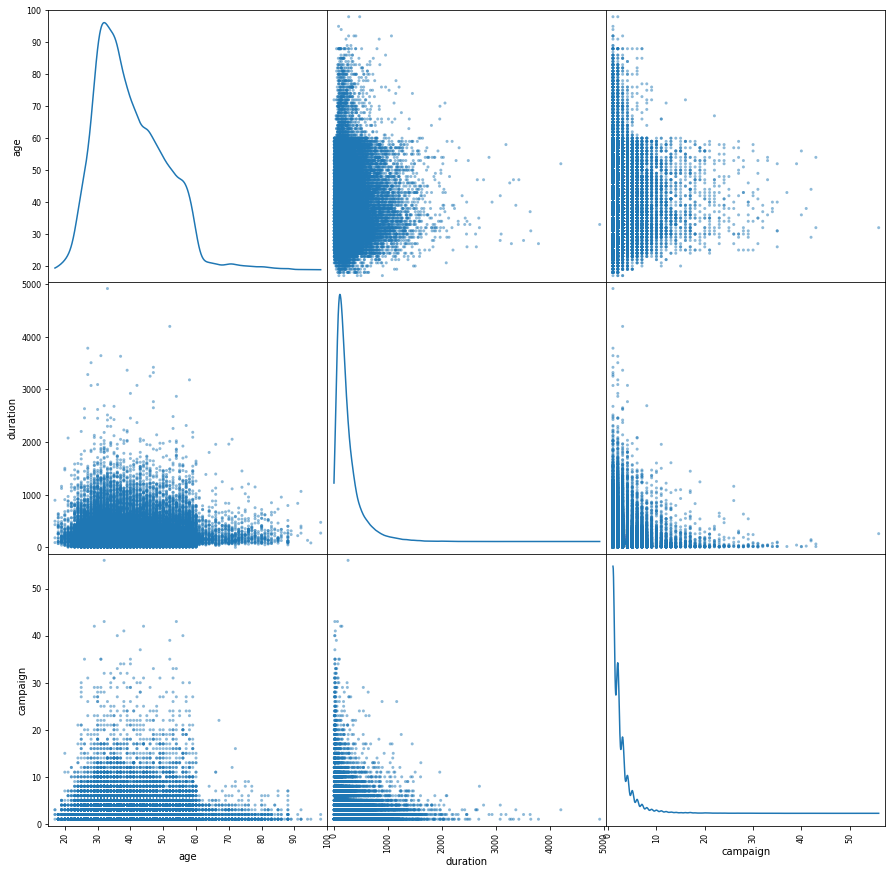

In [27]:
pd.plotting.scatter_matrix(df[["age", "duration", "campaign"]], figsize = (15, 15), diagonal = "kde")
plt.show()

<b>2. Histogram

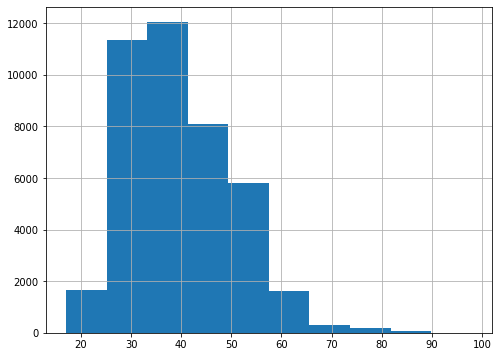

In [28]:
df["age"].hist()

The most of the clients are between the ages 25 and 50, actively working part of population.

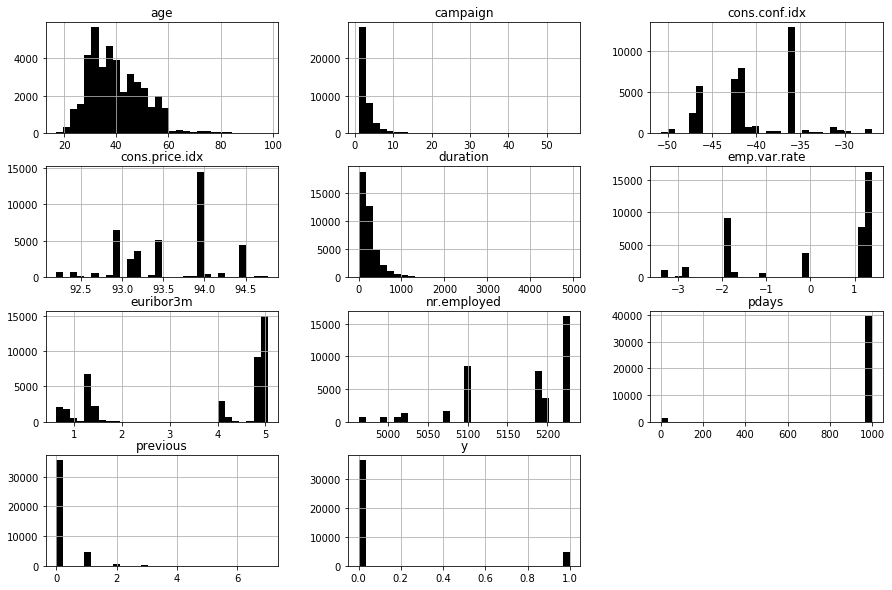

In [29]:
df.hist(color = "k", bins = 30, figsize = (15, 10))
plt.show()

<b>3. Box plot

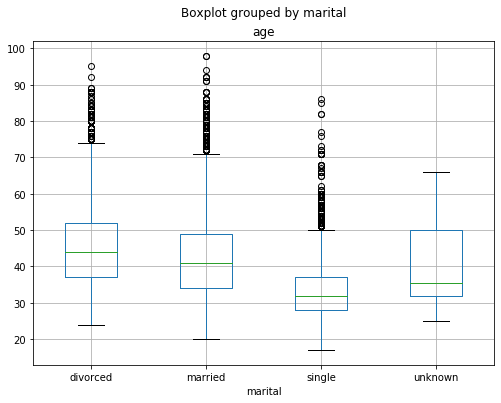

In [30]:
df.boxplot(column = "age", by = "marital")
plt.show()

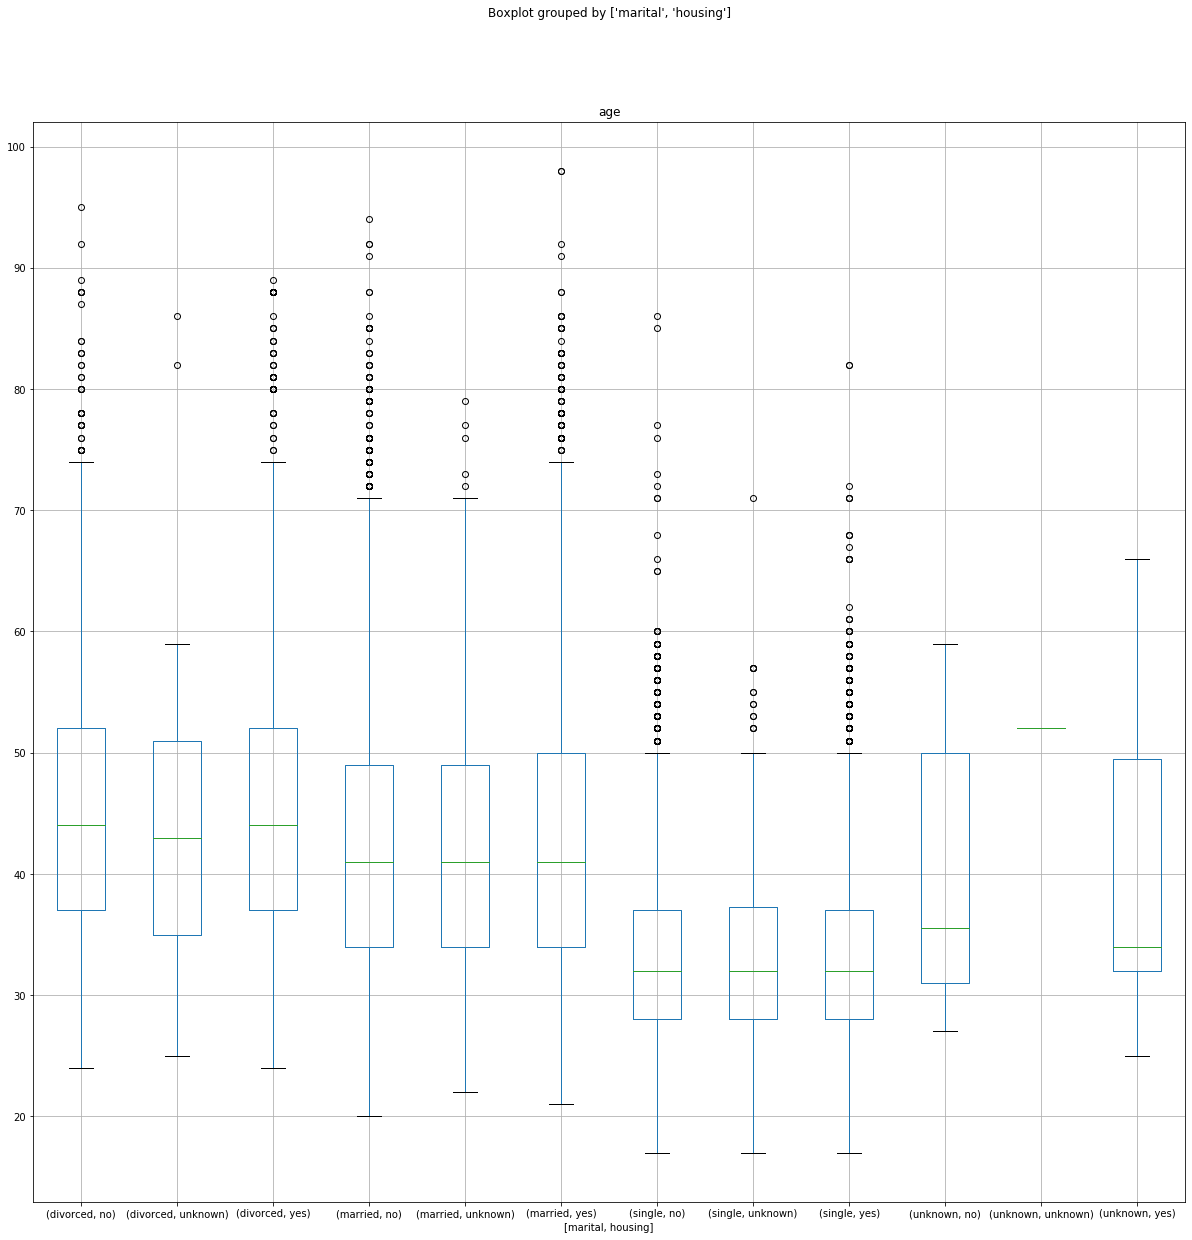

In [31]:
df.boxplot(column = "age", by = ["marital", "housing"], figsize = (20, 20))
plt.show()

### Some extra questions to answer

<b>Question 1:</b> List 10 clients with the largest number of contacts.  

In [32]:
df.sort_values(by = "campaign", ascending = False).head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4107,32,admin.,married,university.degree,unknown,unknown,unknown,telephone,may,mon,...,56,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
18728,54,admin.,married,university.degree,unknown,yes,no,cellular,jul,thu,...,43,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,0
13447,32,technician,single,university.degree,no,yes,yes,telephone,jul,wed,...,43,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,0
4168,29,technician,married,professional.course,no,yes,no,telephone,may,mon,...,42,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
5304,44,retired,married,basic.9y,no,yes,no,telephone,may,fri,...,42,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
11033,38,blue-collar,married,basic.4y,no,yes,no,telephone,jun,wed,...,41,999,0,nonexistent,1.40,94.47,-41.80,4.96,5228.10,0
18754,36,admin.,single,university.degree,no,no,no,cellular,jul,thu,...,40,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,0
11769,56,self-employed,married,professional.course,no,no,yes,telephone,jun,fri,...,40,999,0,nonexistent,1.40,94.47,-41.80,4.96,5228.10,0
4114,52,entrepreneur,married,university.degree,no,no,no,telephone,may,mon,...,39,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
11593,43,technician,married,high.school,no,yes,no,telephone,jun,fri,...,37,999,0,nonexistent,1.40,94.47,-41.80,4.96,5228.10,0


<b>Question 2:</b> Determine the median age and the number of contacts for different levels of client education.

In [33]:
df.pivot_table(["age", "campaign"],["education"], aggfunc = ["mean", "count"],)

mean           count         
                      age campaign    age campaign
education                                         
basic.4y            47.60     2.60   4176     4176
basic.6y            40.45     2.56   2292     2292
basic.9y            39.06     2.53   6045     6045
high.school         38.00     2.57   9515     9515
illiterate          48.50     2.28     18       18
professional.course 40.08     2.59   5243     5243
university.degree   38.88     2.56  12168    12168
unknown             43.48     2.60   1731     1731

<b>Question 3:</b> Output box plot to analyze the client age distribution by their educational level.

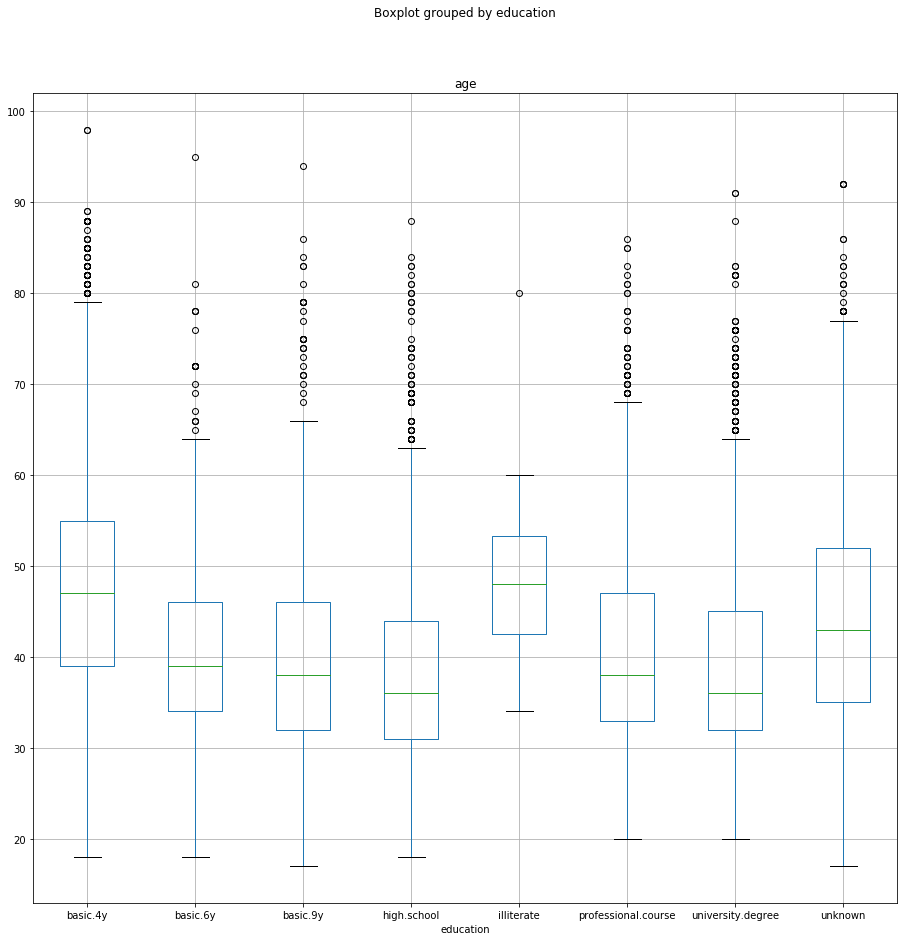

In [34]:
df.boxplot(column = "age",by = "education", figsize = (15, 15))
plt.show()